In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

excel_liquid = pd.read_excel('TGT_wells.xlsx',  sheet_name='Лист1')

# Liquid

<IPython.core.display.Javascript object>


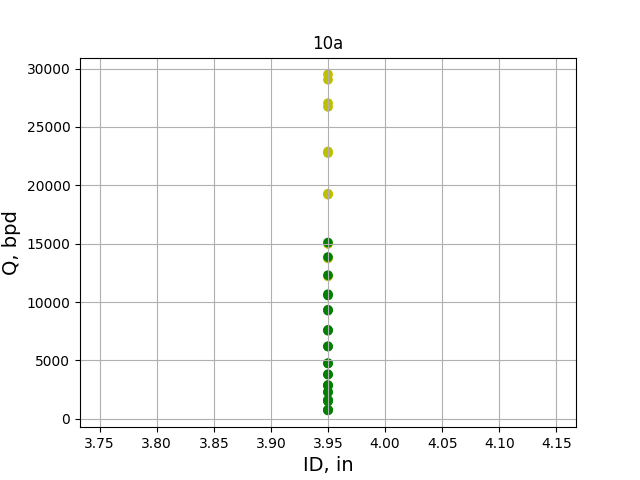

In [147]:
'''
1 - good
2 - normal
3 - bad

'''

chor = '10a'
db = excel_liquid.query(f"Tool == '{chor}' & (Well == 'Almetyevsk(2021)' or Well == 'Almetyevsk')")

Q = db['Max flow rates, BPD']
ID = db['ID']

grade = db['LFP']
grade = np.array(grade)
d = {1:'g', 2:'y', 3:'r'}

plt.scatter(ID, Q, c=[d[i] for i in grade])
plt.xlabel('ID, in', fontsize=14)
plt.ylabel('Q, bpd', fontsize=14)
plt.title(f'{chor}')
plt.grid()

### Расчёты I (интенсивности по Лайтхиллу)

<IPython.core.display.Javascript object>


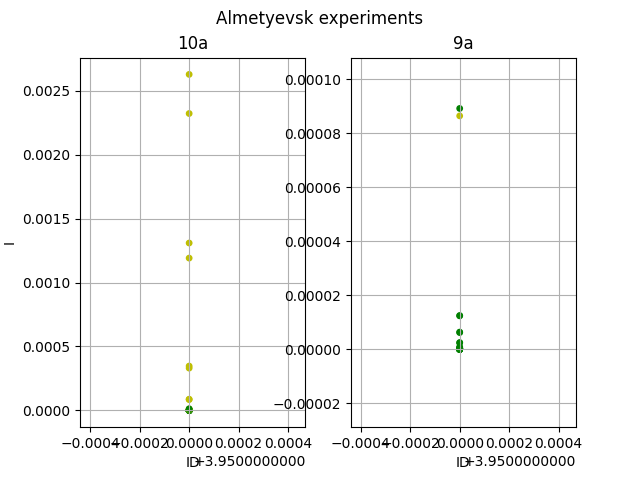

In [142]:
type = 1
# 1 - water, 2 - oil, 3 - gas

'''
Возвращает значение I, принимает расход Q (m3/d) и внутренний диаметр трубы Din (mm)

'''
def return_I(Q, Din):
    Q = Q/24/3600
    # Q=[27 33 39 47 59 67]/24/3600;
    # 1BPD = 0.16 m3/d

    Din = Din*10**(-3) # in mm

    Dsnl = 42*10**(-3)
    d = (Din-Dsnl)/2
    rho_all = [1000, 780, 1.977]
    mu_all = [0.4*10**(-3), 10*10**(-3), 15*10**(-6)]
    c0_all = [1510, 1290, 430]

    rho=rho_all[type-1]
    mu=mu_all[type-1]
    c0=c0_all[type-1]

    Sin=3.1416*(Din/2)**2
    Ssnl=3.1416*(Dsnl/2)**2

    U=Q/(Sin-Ssnl)

    Re=rho*U*d/mu
    I=(rho*U**8*d**2)/(c0**5)*10**6

    result=[U, Re/1000, I*(10**18)]
    
    return I

db_10 = excel_liquid.query(f"Tool == '10a' & (Well == 'Almetyevsk(2021)' or Well == 'Almetyevsk')")
db_9 = excel_liquid.query(f"Tool == '9a' & (Well == 'Almetyevsk(2021)' or Well == 'Almetyevsk')")

Q_10 = db_10['Max flow rates, BPD']
ID_10 = db_10['ID']

I_mass_10 = [return_I(Q*0.16, D*25.4) for Q, D in zip(Q_10, ID_10)]

grade_10 = np.array(db_10['LFP'])
d = {1:'g', 2:'y', 3:'r'}

Q_9 = db_9['Max flow rates, BPD']
ID_9 = db_9['ID']

I_mass_9 = [return_I(Q*0.16, D*25.4) for Q, D in zip(Q_9, ID_9)]
grade_9 = np.array(db_9['LFP'])

x_10 = [i for i in range(len(I_mass_10))]
x_9 = [i for i in range(len(I_mass_9))]

fig, (ax1,ax2) = plt.subplots(1, 2, sharex=True)
fig.suptitle('Almetyevsk experiments', fontsize=12)

ax1.scatter(ID_10, I_mass_10, c=[d[i] for i in grade_10], marker='o', s = 15)
ax1.set_title('10a')
ax1.set_xlabel('ID')
ax1.set_ylabel('I')
ax1.grid()

ax2.scatter(ID_9, I_mass_9, c=[d[i] for i in grade_9], marker='o', s = 15)
ax2.set_title('9a')
ax2.set_xlabel('ID')
ax2.grid()

plt.show()

### Генерация значений Q на разных диаметрах при зафиксированном Icr

<IPython.core.display.Javascript object>


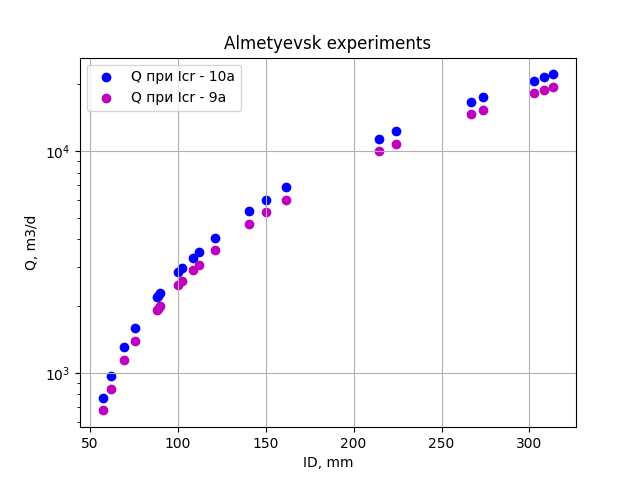

In [148]:
type = 1
# 1 - water, 2 - oil, 3 - gas

Icr = 4*10**(-5)
Icr_9 = 1.4*10**(-5)

Din_inc = [2.441, 2.259, 2.992, 2.750, 3.548, 3.476, 3.958, 3.5, 4.408, 4.044, 4.778,
       4.276, 6.366, 5.92, 5.54, 8.835, 8.435, 10.772, 10.5, 12.347, 12.125, 11.907]
Din = np.array(Din_inc)*25.4*10**(-3)
Dsnl = 40*10**(-3)

d = (Din-Dsnl)/2

rho_all=[1000, 780, 150]
mu_all=[0.4*10**(-3), 10*10**(-3), 0.02*10**(-3)]
c0_all=[1510, 1290, 430]

rho=rho_all[type-1]
mu=mu_all[type-1]
c0=c0_all[type-1]

Sin = 3.1416*(Din/2)**2
Ssnl = 3.1416*(Dsnl/2)**2

Ucr = (Icr*c0**5/(10**6*rho*d**2))**(1/8)
Qcr = np.round(Ucr*(Sin-Ssnl)*24*3600/0.16)
Qcr_m3 = np.round(Ucr*(Sin-Ssnl)*24*3600)

Ucr_9 = (Icr_9*c0**5/(10**6*rho*d**2))**(1/8)
Qcr_9 = np.round(Ucr_9*(Sin-Ssnl)*24*3600/0.16)
Qcr_m3_9 = np.round(Ucr_9*(Sin-Ssnl)*24*3600)

d = {1:'g', 2:'y', 3:'r'}

plt.scatter(np.array(Din_inc)*25.4, Qcr_m3, c = 'b')
plt.scatter(np.array(Din_inc)*25.4, Qcr_m3_9, c = 'm')

plt.yscale('log')
plt.ylabel('Q, m3/d')
plt.xlabel('ID, mm')
plt.legend(['Q при Icr - 10a', 'Q при Icr - 9a'])
plt.title('Almetyevsk experiments')
plt.grid()